# ESC-50 vs ICBHI Mel Spectrogram Comparison

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from src.pretrain.prepare_data.icbhi_pressl import preprocess_entire_spectrogram as icbhi_preprocess_entire_spectrogram
from augmentation.esc50_pressl import preprocess_entire_spectrogram as esc50_preprocess_entire_spectrogram
import random
import pandas as pd
import glob as gb
from tqdm import tqdm

# Ensure reproducibility
random.seed(42)
np.random.seed(42)

In [2]:
# Step 1: Preprocess ICBHI and ESC-50 datasets
icbhi_preprocess_entire_spectrogram(input_sec=8)

  9%|▊         | 79/920 [00:29<02:06,  6.65it/s] 

File /projects/prjs1635/datasets/icbhi/ICBHI_final_database/226_1b1_Pl_sc_LittC2SE not found in splits_data. Skipping.


 43%|████▎     | 395/920 [01:32<01:24,  6.22it/s]

100%|██████████| 920/920 [03:21<00:00,  4.57it/s]

invalid_data 1


In [ ]:
# esc50_preprocess_entire_spectrogram(input_sec=8)

  0%|          | 0/2000 [00:00<?, ?it/s]

 43%|████▎     | 853/2000 [01:07<01:31, 12.48it/s]

Saving debug audio for /projects/prjs1635/datasets/esc-50/audio/2-109505-A-21


100%|██████████| 2000/2000 [02:38<00:00, 12.61it/s]

invalid_data 0


In [3]:
# Step 2: Combine individual ICBHI and ESC-50 specs into stacked arrays

# ESC-50 dataset
esc50_dir = "/projects/prjs1635/datasets/esc-50/entire_spec_npy_8000"
esc50_files = [f for f in os.listdir(esc50_dir) if f.endswith(".npy")]
sampled_esc50 = np.random.choice(esc50_files, size=max(1, int(0.1 * len(esc50_files))), replace=False)
esc50_specs = [np.load(os.path.join(esc50_dir, f)) for f in sampled_esc50]
esc50_specs = np.stack(esc50_specs)

# ICBHI dataset
icbhi_dir = "/projects/prjs1635/datasets/icbhi/entire_spec_npy_8000"
icbhi_files = [f for f in os.listdir(icbhi_dir) if f.endswith(".npy")]
sampled_icbhi = np.random.choice(icbhi_files, size=max(1, int(0.5 * len(icbhi_files))), replace=False)
icbhi_specs = [np.load(os.path.join(icbhi_dir, f)) for f in sampled_icbhi]

# Filter out invalid specs
# ICBHI specs should have shape (624, 64)
print(f"Shape of icbhi_specs: {len(icbhi_specs)} files loaded.")
icbhi_specs_corrected = []

for spec in icbhi_specs:
    if spec.shape != (624,64):
        print(f"Skipping spec with shape: {spec.shape}")
    else:
        icbhi_specs_corrected.append(spec)
        print(f"Appending spec with shape: {spec.shape}")

icbhi_specs = np.stack(icbhi_specs_corrected)
print(f"Total number of valid ICBHI specs: {len(icbhi_specs)}")
print(f"Total number of ESC-50 specs: {len(esc50_specs)}")

Shape of icbhi_specs: 459 files loaded.
Skipping spec with shape: (626, 64)
Appending spec with shape: (624, 64)
Skipping spec with shape: (742, 64)
Skipping spec with shape: (626, 64)
Appending spec with shape: (624, 64)
Appending spec with shape: (624, 64)
Appending spec with shape: (624, 64)
Appending spec with shape: (624, 64)
Skipping spec with shape: (626, 64)
Skipping spec with shape: (626, 64)
Appending spec with shape: (624, 64)
Appending spec with shape: (624, 64)
Appending spec with shape: (624, 64)
Skipping spec with shape: (626, 64)
Appending spec with shape: (624, 64)
Skipping spec with shape: (636, 64)
Appending spec with shape: (624, 64)
Skipping spec with shape: (626, 64)
Appending spec with shape: (624, 64)
Appending spec with shape: (624, 64)
Appending spec with shape: (624, 64)
Skipping spec with shape: (626, 64)
Skipping spec with shape: (626, 64)
Appending spec with shape: (624, 64)
Appending spec with shape: (624, 64)
Skipping spec with shape: (626, 64)
Appending

ESC-50 File: /projects/prjs1635/datasets/esc-50/entire_spec_npy_8000/1-12653-A-15.npy
ICBHI File: /projects/prjs1635/datasets/icbhi/entire_spec_npy_8000/130_1p3_Ll_mc_AKGC417L.npy
##############################################
ESC-50 File: /projects/prjs1635/datasets/esc-50/entire_spec_npy_8000/2-72547-B-14.npy
ICBHI File: /projects/prjs1635/datasets/icbhi/entire_spec_npy_8000/205_1b3_Pr_mc_AKGC417L.npy
##############################################
ESC-50 File: /projects/prjs1635/datasets/esc-50/entire_spec_npy_8000/5-215447-A-47.npy
ICBHI File: /projects/prjs1635/datasets/icbhi/entire_spec_npy_8000/130_2b4_Lr_mc_AKGC417L.npy
##############################################


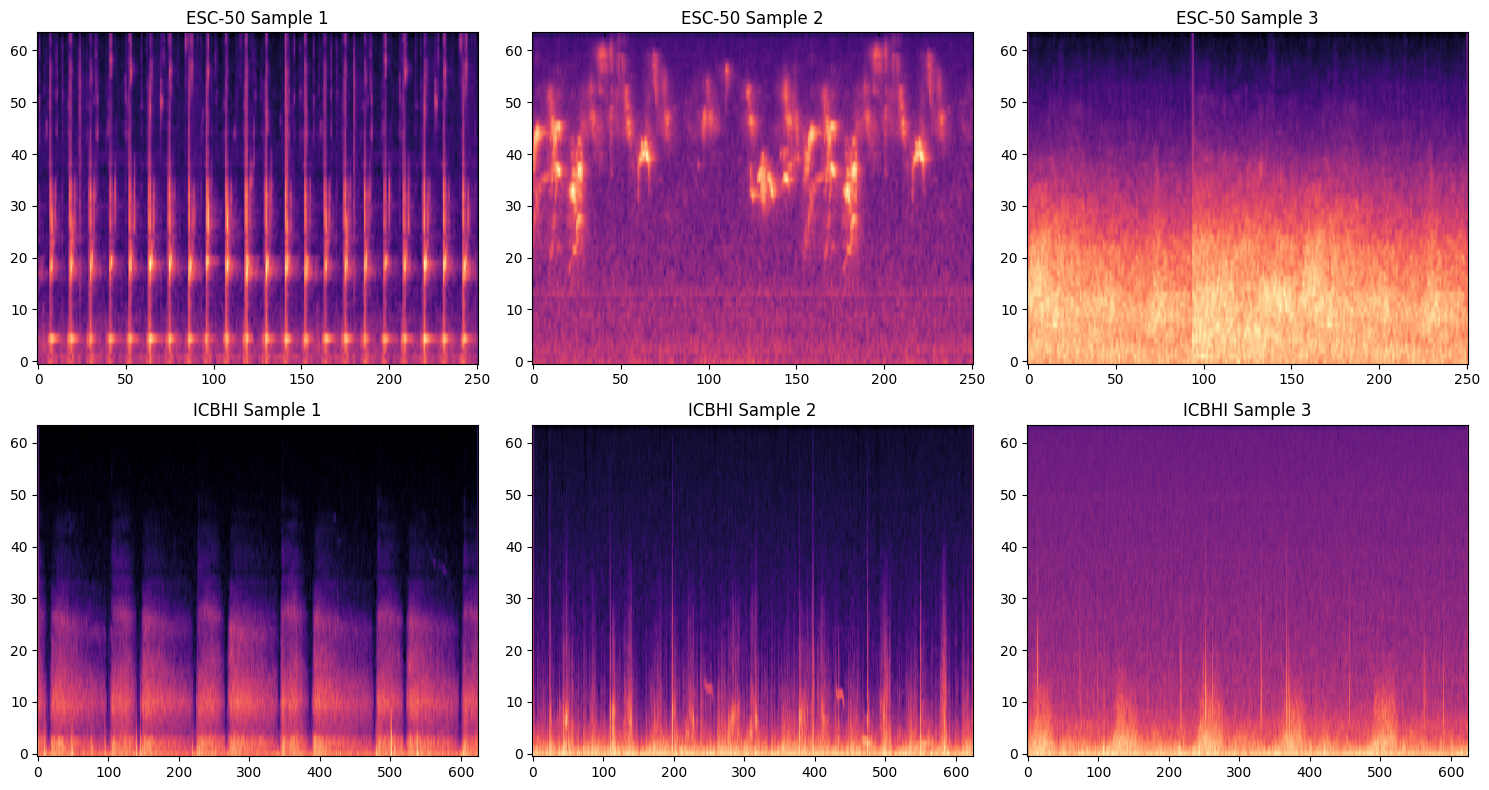

In [4]:
# Step 3: Visualize examples
from IPython.display import Audio, display


fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for i in range(3):
    idx = random.randint(0, min(len(esc50_specs), len(icbhi_specs)) - 1)
    axs[0, i].imshow(esc50_specs[idx].T, origin='lower', aspect='auto', cmap='magma')
    axs[0, i].set_title(f'ESC-50 Sample {i+1}')
    axs[1, i].imshow(icbhi_specs[idx].T, origin='lower', aspect='auto', cmap='magma')
    axs[1, i].set_title(f'ICBHI Sample {i+1}')

    # Print the file names for reference
    esc50_file = os.path.join(esc50_dir, sampled_esc50[idx])
    icbhi_file = os.path.join(icbhi_dir, sampled_icbhi[idx])
    print(f"ESC-50 File: {esc50_file}")
    print(f"ICBHI File: {icbhi_file}")
    print("##############################################")

plt.tight_layout()
plt.show()

ESC-50 Sample 0: /projects/prjs1635/datasets/esc-50/entire_spec_npy_8000/5-214759-B-5.npy
ESC-50 Sample 1: /projects/prjs1635/datasets/esc-50/entire_spec_npy_8000/4-189830-A-22.npy
ESC-50 Sample 2: /projects/prjs1635/datasets/esc-50/entire_spec_npy_8000/4-173865-A-9.npy
ESC-50 Sample 3: /projects/prjs1635/datasets/esc-50/entire_spec_npy_8000/4-161303-A-5.npy
ESC-50 Sample 4: /projects/prjs1635/datasets/esc-50/entire_spec_npy_8000/3-94342-A-25.npy
ESC-50 Sample 5: /projects/prjs1635/datasets/esc-50/entire_spec_npy_8000/3-108160-A-23.npy
ESC-50 Sample 6: /projects/prjs1635/datasets/esc-50/entire_spec_npy_8000/1-160563-B-48.npy
ESC-50 Sample 7: /projects/prjs1635/datasets/esc-50/entire_spec_npy_8000/2-135649-A-45.npy
ESC-50 Sample 8: /projects/prjs1635/datasets/esc-50/entire_spec_npy_8000/5-214759-B-5.npy
ESC-50 Sample 9: /projects/prjs1635/datasets/esc-50/entire_spec_npy_8000/2-100648-A-43.npy
ESC-50 Sample 10: /projects/prjs1635/datasets/esc-50/entire_spec_npy_8000/1-155858-D-25.npy
ESC

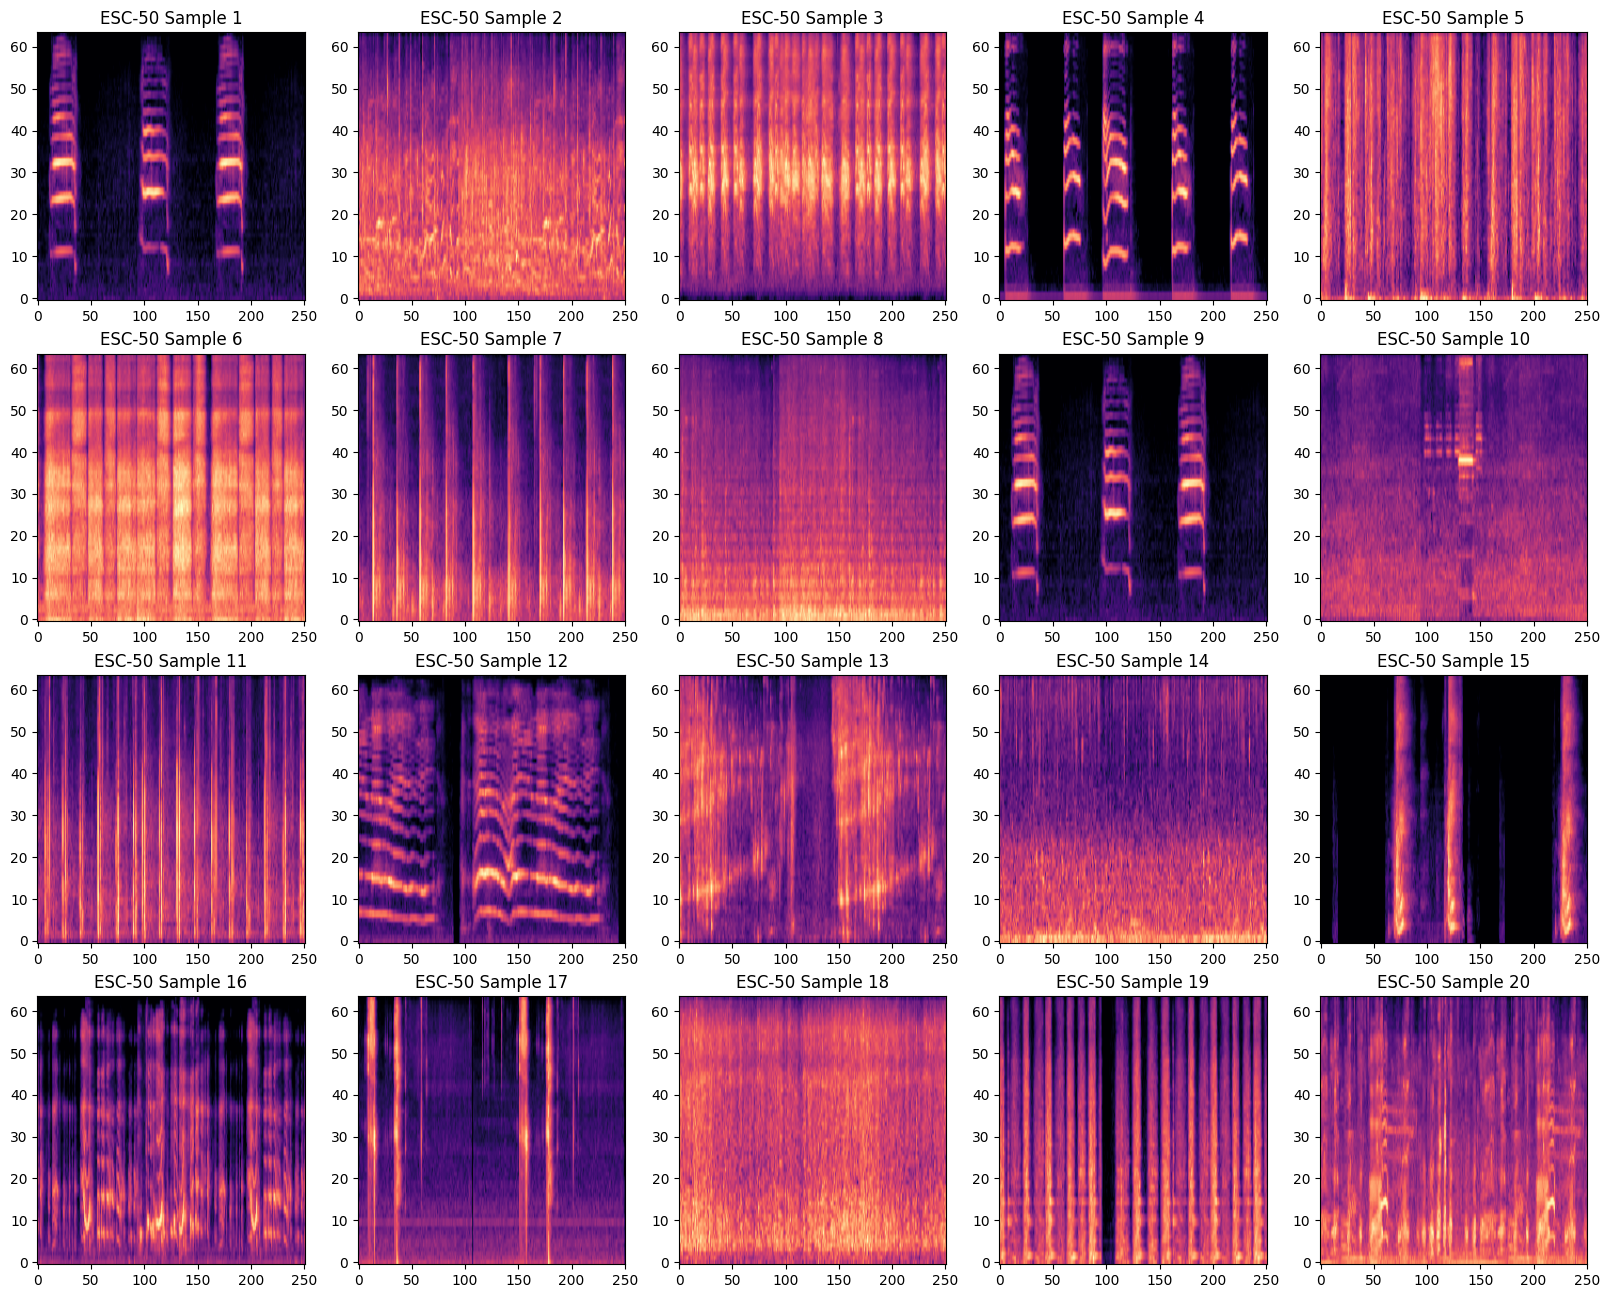

In [5]:
# Plot 20 random ESC-50 spectrograms
fig, axs = plt.subplots(4, 5, figsize=(20, 16))
for i in range(20):
    idx = random.randint(0, len(esc50_specs) - 1)
    axs[i // 5, i % 5].imshow(esc50_specs[idx].T, origin='lower', aspect='auto', cmap='magma')
    axs[i // 5, i % 5].set_title(f'ESC-50 Sample {i+1}')

    # Print the file name for reference
    esc50_file = os.path.join(esc50_dir, sampled_esc50[idx])
    print(f"ESC-50 Sample {i}: {esc50_file}")

In [6]:
# compare statistics
def compute_stats(specs):
    return {
        'mean': np.mean(specs),
        'std': np.std(specs),
        'min': np.min(specs),
        'max': np.max(specs)
    }

esc50_stats = compute_stats(esc50_specs)
icbhi_stats = compute_stats(icbhi_specs)

print("ESC-50 Stats:", esc50_stats)
print("ICBHI Stats:", icbhi_stats)

ESC-50 Stats: {'mean': 0.42355803, 'std': 0.22015265, 'min': 0.0, 'max': 1.0}
ICBHI Stats: {'mean': 0.29634658, 'std': 0.18547055, 'min': 0.0, 'max': 1.0}
